## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [448]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [449]:
#Read ab_data.csv into data framework
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [450]:
# Display row count
print("Total dataset rows: {}".format(df.shape[0]))

Total dataset rows: 294478


c. The number of unique users in the dataset.

In [451]:
# Display unique users
print("Total unique users: {}".format(df.nunique()['user_id']))

Total unique users: 290584


d. The proportion of users converted.

In [452]:
# Proporion of converted users: Total converted/Total users
prop_cnvrtd = (df.converted[df.converted==1].count())/df.shape[0]
print("Proportion Converted users {}%".format(prop_cnvrtd*100))

Proportion Converted users 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't match.

In [453]:
#Find where treatment group incorrectly land on 'old_page'
trtmnt_neq_np = df.query("group == 'treatment' and landing_page != 'new_page'")
#print number of times treatment group DOES NOT land on new_page
print("Times treatment group DOES NOT land on new_page is {}".format(len(trtmnt_neq_np)))

#---
#Find where control group incorrectly land on 'new_page'
cntrl_neq_op = df.query("group == 'control' and landing_page != 'old_page'")
#Print number of times control group DOES NOT land on old_page
print("Times control group DOES NOT land on old_page is {}".format(len(cntrl_neq_op)))

#---
#Total times treatment group doesn't land on new_Page AND control group land on new page
print("Total times treatment group did NOT land on new_page AND \n control group INCORRECTLY landed on new_page {}".format(len(trtmnt_neq_np) + len(cntrl_neq_op)))

Times treatment group DOES NOT land on new_page is 1965
Times control group DOES NOT land on old_page is 1928
Total times treatment group did NOT land on new_page AND 
 control group INCORRECTLY landed on new_page 3893


f. Do any of the rows have missing values?

In [454]:
#Find rows with missing values
df.isnull().sum(axis = 0)

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [455]:
#Remove records where treatment group landed on old_page
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
#---
#Remove records where control group landed on new_page
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)
#---
df2 = df

In [456]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [457]:
# Count unique users
total_uniq_users = df2.nunique()['user_id']
# Display unique users
print("Total unique users: {}".format(total_uniq_users))

Total unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [458]:
#Find duplicate user_id
df2[df2["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [459]:
#Find duplicate user_id row information
df2[df2["user_id"].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [460]:
#drop duplicate user_id
df2.drop_duplicates(['user_id'], inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [461]:
#Calc mean of all converted to determine probility to convert
df['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [462]:
#Extract control group and calc mean for converted
cntrl_and_convert = df.query("group == 'control'")
print('control group converted: ', cntrl_and_convert['converted'].mean())

control group converted:  0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [463]:
#Extract treatment group and calc mean for converted
trtmnt_and_convert = df.query("group == 'treatment'")
print('treatment group converted: ',trtmnt_and_convert['converted'].mean())

#Differences in Means for control and treatment group conversions
abdata_mean_diff = trtmnt_and_convert['converted'].mean() - cntrl_and_convert['converted'].mean()
abdata_mean_diff

treatment group converted:  0.118808065515


-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [464]:
new_pages_count = len(df.query("landing_page == 'new_page'"))
new_row_count = df.shape[0]
new_page_probability = new_pages_count/new_row_count
print('probability of receiving new page: ',new_page_probability )

probability of receiving new page:  0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**
The control group probability of being converted is marginally better (at 0.1203) than the treatment group (at 0.1188) and thus evidence does not exist that the new treatment page lead to more conversions. Testing may be required for a longer duration, at a different periods or until a plateau stage is reached to ensure the testing was comprehensive enough to allow the results to present significance should it be present.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
H0: pnew - pold <= 0 (old_pages convert equaly or more than new_pages)
H1: pnew - p0ld > 0  (new_pages convert more than old_pages)
alpha=0.05 (reject H0 on p-value <= alpha (on small p-value))

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [465]:
#find p_new conversion rate under H0 {Assuming equal success rates to converted sucess rates where p_new - p_old}
p_new = df2['converted'].mean()
print('p_new under the null: {}%'.format(p_new))

p_new under the null: 0.11959708724499628%


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [466]:
#find p_old conversion rate under H0 {Assuming equal success rates to converted sucess rates where p_new - p_old}
p_old = df2['converted'].mean()
print('p_old under the null: {}%'.format(p_old))

p_old under the null: 0.11959708724499628%


c. What is $n_{new}$, the number of individuals in the treatment group?

In [467]:
#count individuals in treatement group
n_new = len(df2.query("group == 'treatment'"))
print("individuals in treatment group: {}".format(n_new))

individuals in treatment group: 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [468]:
#count individuals in control group
n_old = len(df2.query("group == 'control'"))
print("individuals in control group: {}".format(n_old))

individuals in control group: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [469]:
#simulate n_new transactions at conversion rate of p_new under the null
new_page_converted = np.random.choice([1, 0], size=n_new, p=(1-p_new,p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [470]:
#simulate n_old transactions at conversion rate of p_old
old_page_converted = np.random.choice([1, 0], size=n_old, p=(1-p_old,p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [471]:
#Difference between p_new and p_old
old_page_converted_mean = old_page_converted.mean()
new_page_converted_mean = new_page_converted.mean()
new_page_converted_mean - old_page_converted_mean


-0.0014499559842091614

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [472]:
# Create 10K simulations with boostrapping
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],n_new,p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([0,1],n_old,p=[p_old, 1-p_old])
    #difference in bootstrapped means
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
#new_page_converted
#old_page_converted

In [473]:
#convert to arrray
p_diffs = np.array(p_diffs)
p_diffs.mean()

4.3429066150453056e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,1,'p_new - p_old simulated 10K times')

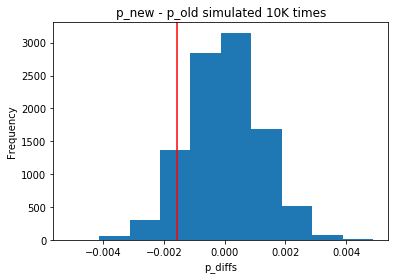

In [474]:
#Plot p_diffs
plt.hist(p_diffs)
#Insert original samples difference in means
plt.axvline(x=abdata_mean_diff, color='red');
#label axis and title
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('p_new - p_old simulated 10K times')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [475]:
#proportion df2 means (mean.(p_new converted) - mean.(p_old converted)) - bootstrap means (mean.(p_new converted) - mean.(p_old converted))  
(abdata_mean_diff < p_diffs).mean()


0.90590000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
p-value was calculated in j.
With p_value = 0,9 (greater than alpha (0.05)) we fail to reject H0.
H0 is not rejected and thus implies that the new pages do not show a greater conversion rate than the old pages (supported by the negligible difference between new_page conversion rate mean of 0.1204 and that of the old_page conversion rate mean of 0.1188).


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [476]:
import statsmodels.api as sm
#Conversions
convert_old = sum(df2.query("group == 'control'")['converted'])
print('old pages converted: {}'.format(convert_old))
convert_new = sum(df2.query("group == 'treatment'")['converted'])
print('new pages converted: {}'.format(convert_new))

#Number of page visits
n_old = len(df2.query("group == 'control'"))
print('old page visits: {}'.format(n_old))
n_new = len(df2.query("group == 'treatment'"))
print('new page visits: {}'.format(n_new))

old pages converted: 17489
new pages converted: 17264
old page visits: 145274
new page visits: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [477]:
#Do z-score (H1 (right-tailed): p > p0 (population proportion > than some hypothesized value p0))
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('z-value {}'.format(z_score), 'p-value {}'.format(p_value))

z-value 1.3109241984234394 p-value 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
The positive z-score indicate a data value 1.3 std dev greater than the mean, (as seen in the data plot).
The p-value tracks our calculated p-value indicating that the conversion rate for the new page is not better and we fail to reject H0 as the statistic appears to be from H0.I thus agree with the findings in parts j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [478]:
#Add intercept column
df2['intercept'] = 1
#pull control and treatment groups into binary colum
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
#drop duplicate information column(s). ab_page 1 = treament, 0 = control
df2.drop(['group','control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [479]:
#instatiate model
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [480]:
#Fit model to determine if individual converts
results = model.fit()
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-16 09:19 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
In this case:
H0: pold = pnew          (in partII: H0 pold >= pnew)
H1: pnew <> pold         (in partII: H1 pnew > pold)
p-value = 0.1899
The null hypothesis of logistic regression is that no relationship exist between X variables and Y variables and the closer p-value gets to 1 the greater the propability. Thus with a small p-value we deduce that there is no relationship between converted and ab_page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
Factors such as people allocation to group (experience, job, age, gender, income) may affect if an individual converts or not. We also need to considder Simpson's paradox, change aversion, situational factors etc. We could also further divide the data to understand e.g. time periods that conversions occur.

Adding high correlations predictor variables can cause multicollinearity  (unreliable estimates of regression coefficients) affecting the model in that previously significant predictor may no longer be significant.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [481]:
#import countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [482]:
#create dummies variables for country and drop first column
tmp_df = pd.get_dummies(countries_df['country'],  prefix='abpage', drop_first=True)
tmp_df.head()

,abpage_UK,abpage_US
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [483]:
#join df2 and tmp_df on index = user_id
joined_df = pd.concat([df2, tmp_df], axis=1, join='inner')
joined_df.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page,abpage_UK,abpage_US
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1,1,0
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0,1,0


In [484]:
#Fit model to determine if contries affect conversions
joined_df['intercept'] = 1

model2 = sm.Logit(joined_df['converted'], joined_df[['intercept', 'ab_page', 'abpage_US', 'abpage_UK']])
results2 = model2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366154
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-16 09:19 AIC:              209991.5191
No. Observations:   286742           BIC:              210033.7844
Df Model:           3                Log-Likelihood:   -1.0499e+05
Df Residuals:       286738           LL-Null:          -1.0499e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0145    0.0266  -75.6136  0.0000  -2.0667  -1.9623
ab_page       -0.0158    0.0115   -1.3757  0.1689  -0.0384   0.0067
abpage_US      0.0260    0.0269    0.9677  0.3332  -0.0267   0.0788
abpage_UK      0.0323    0.0284    1.1344  0.2566  -0.0235   0.0880
==================================================================

"""

In [485]:
#Std normal probabilities for z-score
np.exp(results2.params)

intercept    0.133389
ab_page      0.984291
abpage_US    1.026382
abpage_UK    1.032792
dtype: float64

In [486]:
#Provide the statistical output as well as a written response to answer this question:
#The null hypothesis would be that the country does not affect the conversion.
#With p-values of 0.3332 and 0.2566 > 0.05 it appears that H0 cannot be rejected (supported by P<z)
#all coefficients have p-value > 0.05 (not statistically significant)

#ab_page: 0.98 times more likely to convert for each unit increase in ab_page  - holding all else constant
#abpage_UK: 1.026 times more likely to convert on UK/page interaction - holding all else constant.
#abpage_US: 1.033 times more likely to occur on US/page interactions - holding al

In [487]:
#for values less than 1
1/np.exp(results2.params)

intercept    7.496867
ab_page      1.015960
abpage_US    0.974296
abpage_UK    0.968249
dtype: float64

In [488]:
#ab_page 1.5% ((1.015-1)*100) more likely to convert

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [489]:
#create new columns for page*country
joined_df['UK*abpage']=joined_df.ab_page*joined_df.abpage_UK
joined_df['US*abpage']=joined_df.ab_page*joined_df.abpage_US
joined_df.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page,abpage_UK,abpage_US,UK*abpage,US*abpage
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1,1,0,1,0
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1,1,0,1,0
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0,1,0,0,0


In [490]:
model3=sm.Logit(joined_df['converted'],joined_df[['intercept','ab_page','abpage_UK','abpage_US','UK*abpage','US*abpage']])
results3=model3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366150
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-16 09:19 AIC:              209993.0310
No. Observations:   286742           BIC:              210056.4290
Df Model:           5                Log-Likelihood:   -1.0499e+05
Df Residuals:       286736           LL-Null:          -1.0499e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0534    0.0373  -55.0508  0.0000  -2.1265  -1.9803
ab_page        0.0610    0.0521    1.1716  0.2413  -0.0410   0.1630
abpage_UK      0.0688    0.0407    1.6914  0.0908  -0.0109   0.1485
abpage_US      0.0684    0.0385    1.7760  0.0757  -0.0071   0.1440
UK*abpage     -0.0720    0.0569   -1.2654  0.2057  -0.1835   0.0395
US*abpage     -0.0839    0.0538   -1.5584  0.1191  -0.1894   0.0216
==================================================================

"""

In [491]:
np.exp(results3.params)

intercept    0.128302
ab_page      1.062885
abpage_UK    1.071187
abpage_US    1.070839
UK*abpage    0.930520
US*abpage    0.919519
dtype: float64

In [492]:
#all coefficients have p-value > 0.05 (not statistically significant)
#ab_page: 0.98 times more likely to convert for each unit increase in ab_page - olding all else constant.
#abpage_UK: 1.07 times more likely to convert if user is from UK - holding all else constant.
#abpage_US: 1.07 times more likely to convert if user is from US - holding all else constant.
#UK*abpage: 0.93 times more likely to convert if user is from UK - holding all else constant.
#US*abpage: 0.92 times more likely to convert if user is from US - holding all else constant.

In [445]:
#for values less than 1
1/np.exp(results3.params)


intercept    7.794081
ab_page      0.940835
abpage_UK    0.933544
abpage_US    0.933848
UK*abpage    1.074668
US*abpage    1.087525
dtype: float64

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [447]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0